## Hypothesis 3: Runtime Preference
### <b>‘Movies with a runtime between 120 and 150 minutes tend to perform better commercially.’<br></b>

<u>Supporting Evidence:<br></u>

The dataframe suggests that many successful movies fall within this runtime range.<br>

Steps to Analyze Runtime Preference<br>

Clean and Extract Runtime Data: First, extract and clean the runtime data from your dataset, ensuring it's in a numeric format (e.g., minutes).<br>

Classify Movies Based on Runtime: Group movies into categories based on their runtime (e.g., less than 120 minutes, between 120-150 minutes, and more than 150 minutes).<br>

Analyze BoxOffice Performance: Analyze how the BoxOffice revenue (or IMDb ratings, if BoxOffice data is not available) correlates with different runtime categories.<br>

Visualize the Results: Create plots to visualize the performance of movies in different runtime categories.

In [46]:
import pandas as pd
import requests
import time
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

csv_file_path = '/Users/mbouch17/Desktop/IronHack/Labs &  Project/Project-3-Week-3/ready_to_analyse/2000_2249_cleaned_movies_data.csv'
df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')  # Specify encoding
df.head()

,Title,Year_x,Certificate,Duration,Genre_x,Rating,Metascore_x,Director_x,Cast,Votes,...,Plot,Actors,Metascore_y,Director_y,imdbRating,imdbVotes,Awards,Country,Language,BoxOffice
0,The Ides of March,2021.0,A,101.0,"Drama, Thriller",7.1,67.0,George Clooney,"Paul Giamatti, George Clooney, Philip Seymour ...","231,033",...,An idealistic staffer for a new presidential c...,"Paul Giamatti, George Clooney, Philip Seymour ...",67.0,George Clooney,7.1,"232,644",Nominated for 1 Oscar. 9 wins & 36 nominations...,United States,English,"$40,962,534"
1,What Happened to Monday,2021.0,A,123.0,"Action, Crime, Fantasy",6.8,47.0,Tommy Wirkola,"Noomi Rapace, Glenn Close, Willem Dafoe, Marwa...","134,778",...,In a world where families are limited to one c...,"Noomi Rapace, Glenn Close, Willem Dafoe",47.0,Tommy Wirkola,6.8,"136,658",1 nomination,"United Kingdom, France, United States, Belgium",English,NaN
2,Haunted Mansion,2021.0,PG-13,123.0,"Comedy, Drama, Family",6.0,47.0,Justin Simien,"LaKeith Stanfield, Rosario Dawson, Owen Wilson...","43,039",...,"A single mom named Gabbie hires a tour guide, ...","LaKeith Stanfield, Rosario Dawson, Owen Wilson",NaN,Justin Simien,6.0,"44,851",7 nominations,"United States, Canada","English, French, Spanish","$67,653,287"
3,Demolition Man,2021.0,A,115.0,"Action, Sci-Fi, Thriller",6.7,34.0,Marco Brambilla,"Sylvester Stallone, Wesley Snipes, Sandra Bull...","193,725",...,A police officer is brought out of suspended a...,"Sylvester Stallone, Wesley Snipes, Sandra Bullock",34.0,Marco Brambilla,6.7,"196,455",1 win & 7 nominations,United States,English,"$58,055,768"
4,Brightburn,2021.0,A,90.0,"Drama, Horror, Mystery",6.1,44.0,David Yarovesky,"Elizabeth Banks, David Denman, Jackson A. Dunn...","108,055",...,What if a child from another world crash-lande...,"Elizabeth Banks, David Denman, Jackson A. Dunn",44.0,David Yarovesky,6.1,"110,483",1 win & 2 nominations,United States,English,"$17,300,439"


Runtime_Category
120-150 min    4.736540e+07
< 120 min      5.777830e+07
> 150 min      5.536686e+07
Name: BoxOffice, dtype: float64


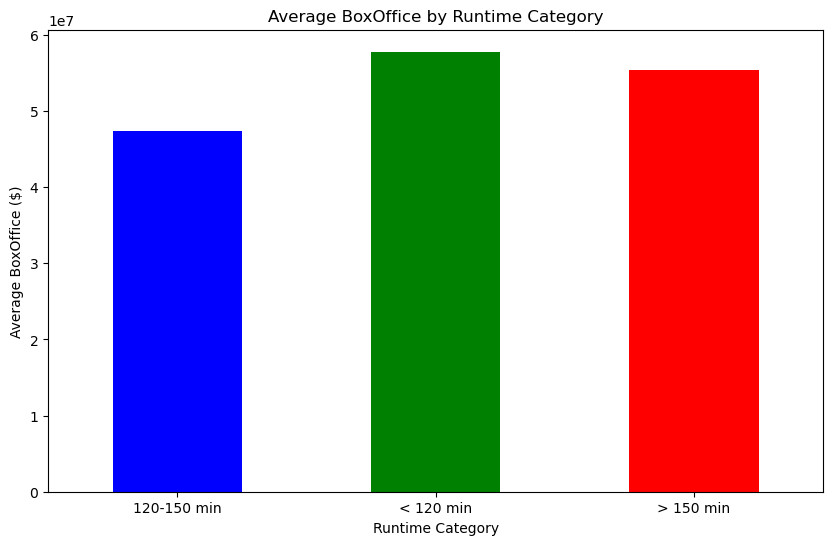

In [48]:
# Clean and extract runtime (Assume 'Runtime' is in the format '130 min')
def clean_runtime(runtime):
    if isinstance(runtime, str):
        return pd.to_numeric(runtime.replace(' min', ''), errors='coerce')
    return None

df['Runtime'] = df['Runtime'].apply(clean_runtime)

# Clean and convert BoxOffice data (Assume it's in the format '$xxx,xxx,xxx')
def clean_box_office(box_office):
    if isinstance(box_office, str):
        return pd.to_numeric(box_office.replace('$', '').replace(',', ''), errors='coerce')
    return None

df['BoxOffice'] = df['BoxOffice'].apply(clean_box_office)

# Drop movies with missing Runtime or BoxOffice
df = df.dropna(subset=['Runtime', 'BoxOffice'])

# Group movies by runtime categories
def classify_runtime(runtime):
    if runtime < 120:
        return '< 120 min'
    elif 120 <= runtime <= 150:
        return '120-150 min'
    else:
        return '> 150 min'

df['Runtime_Category'] = df['Runtime'].apply(classify_runtime)

# Group by runtime category and calculate average BoxOffice
runtime_boxoffice_avg = df.groupby('Runtime_Category')['BoxOffice'].mean()

# Print the average BoxOffice for each runtime category
print(runtime_boxoffice_avg)

# Visualize the result
plt.figure(figsize=(10, 6))
runtime_boxoffice_avg.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average BoxOffice by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average BoxOffice ($)')
plt.xticks(rotation=0)
plt.show()

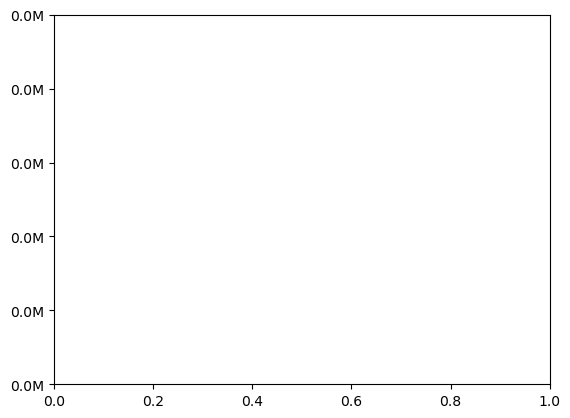